# Step 1: Play Around with Embedding

- Twitch-specific embedding from https://github.com/konstantinkobs/emote-controlled

In [3]:
import gensim
from pathlib import Path
import csv
import datetime
import os
from pprint import pprint

In [4]:
model = gensim.models.word2vec.Word2Vec.load('embedding/embedding') # Download this by following the instructions in https://github.com/konstantinkobs/emote-controlled
wv = model.wv
del model

In [3]:
# Examples from https://github.com/konstantinkobs/emote-controlled/blob/master/query_embedding.py

print("Detection of the odd word")
print("=========================")
print("youtube, twitch, instagram:")
pprint(wv.doesnt_match("youtube twitch instagram".split(" ")))
print("\n")

###############################################
## Task 2: Words that fit in a given context ##
###############################################

print("Words that fit in a given context")
print("=================================")
print("monday, tuesday, wednesday:")
pprint(wv.most_similar_cosmul("monday tuesday wednesday".split(" ")))
print("\n")

############################
## Task 3: Word relations ##
############################

print("Word relations")
print("==============")
print("Man relates to Woman as King to ...:")
pprint(wv.most_similar_cosmul(positive=['king', 'woman'], negative=['man']))
print("\n")

###################################
## Task 4: Emote intensification ##
###################################

print("Emote intensifications")
print("======================")
print("LUL relates to OMEGALUL as FeelsGoodMan to ...:")
pprint(wv.most_similar_cosmul(positive=['OMEGALUL', 'FeelsGoodMan'], negative=['LUL']))

Detection of the odd word
youtube, twitch, instagram:


/Users/shoyayoshida/opt/anaconda3/envs/py37/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'instagram'


Words that fit in a given context
monday, tuesday, wednesday:
[('thursday', 0.957784116268158),
 ('saturday', 0.9165282249450684),
 ('sunday', 0.9071373343467712),
 ('friday', 0.8335966467857361),
 ('tomorrow', 0.7105387449264526),
 ('thurs', 0.6839190721511841),
 ('2pm', 0.6446587443351746),
 ('wed', 0.6399439573287964),
 ('fridays', 0.6398335099220276),
 ('thursdays', 0.6396904587745667)]


Word relations
Man relates to Woman as King to ...:
[('queen', 0.9875078201293945),
 ('princess', 0.9762540459632874),
 ('prince', 0.9511711001396179),
 ('murderer', 0.9334141612052917),
 ('shepard', 0.9321715831756592),
 ('goddess', 0.9280776977539062),
 ('lizard', 0.9277330636978149),
 ('lion', 0.9205520749092102),
 ('crow', 0.9201782941818237),
 ('bird', 0.9195780158042908)]


Emote intensifications
LUL relates to OMEGALUL as FeelsGoodMan to ...:
[('feelsamazingman', 0.9217232465744019),
 ('and', 0.8582755327224731),
 ('Clap', 0.856436550617218),
 ('also', 0.8555846810340881),
 ('

In [4]:
wv.most_similar_cosmul(positive=['Pog'])

[('pagchomp', 0.9152676463127136),
 ('POGGERS', 0.891425371170044),
 ('pogu', 0.8613439202308655),
 ('pog', 0.8541739583015442),
 ('OMEGALUL', 0.852812647819519),
 ('forsen', 0.8438662886619568),
 ('LULW', 0.8396608829498291),
 ('😡', 0.8323566913604736),
 ('and', 0.8260711431503296),
 ('.', 0.8258835673332214)]

# Step 2: Clustering 

Chat Messages Downloaded: 
- Riot Games (LoL)
    - https://www.twitch.tv/videos/770925254?filter=all&sort=views
    - https://www.twitch.tv/videos/756260657?filter=all&sort=views
    
- xQcOW (MineCraft)
    - https://www.twitch.tv/videos/911761347?filter=all&sort=views 
    - https://www.twitch.tv/videos/893334860?filter=all&sort=views 
    
- Sykkuno (Among Us, Valorant)
    - https://www.twitch.tv/videos/894695595?filter=all&sort=views
    - https://www.twitch.tv/videos/914368342?filter=all&sort=views
    

- The original paper used streams from forsen, moonmoon_ow, riotgames, sodapoppin, and xqcow for their task of sentiment analysis. 

Clustering: 
    
- We will use HDBSCAN since it doesn't require a pre-decided number of clusters, and it is very efficient (all the other ones take a millenium to finish). 

In [5]:
import sys
sys.path.append("../utils") 
from twitch_tokenizer import TwitchTokenizer
from srt import srt2df
import os 
import numpy as np 
import pandas as pd 

In [13]:
data_dir = '../data/chat'
for channel in os.listdir(data_dir):
    if channel != '.DS_Store':
        for srt_file in os.listdir(os.path.join(data_dir,channel)):
            if srt_file != '.DS_Store':
                df = srt2df(os.path.join(data_dir,channel,srt_file))
                print(channel,srt_file, df.shape[0])

riot_games_LoL 756260657.srt 88886
riot_games_LoL 770925254.srt 94732
xQcOW_minecraft 911761347.srt 293815
xQcOW_minecraft 893334860.srt 299324
sykkuno_amongus_valorant 894695595.srt 75665
sykkuno_amongus_valorant 914368342.srt 97726


In [4]:
df = srt2df('../data/chat/riot_games_LoL/756260657.srt')
df

,message,start_time
0,PauseChamp,00:00:08.310000
1,catJAM catJAM catJAM catJAM catJAM catJAM catJ...,00:00:09.845000
2,STARTFARM BBY,00:00:18.481000
3,aqyyyye,00:00:32.686000
4,FIRST,00:00:36.784000
...,...,...
89719,@Azufre23 Well TSM and TL might make it out,07:38:42.115000
89720,even when lck doesn't win worlds they still us...,07:38:46.566000
89721,IF YOU WOULD BE SO ENTUSIASM FOR WORLD HUNGER ...,07:38:47.159000
89722,♿ MAKE WAY NA PASSING BY ♿ DIDN'T GET OUT OF G...,07:38:48.241000


In [66]:
from sklearn.decomposition import PCA, KernelPCA,TruncatedSVD
from matplotlib import pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import hdbscan
from sklearn.metrics import pairwise_distances_argmin_min

class ChatVisualizer:
    def __init__(self,srt_paths,wv,output_path,MAX_WORDS=10,dimensionality_method='pca',cluster_method='kmeans',n_clusters=8):
        self.srt_paths = srt_paths
        self.wv = wv 
        self.MAX_WORDS = MAX_WORDS
        self.tokenizer = TwitchTokenizer()
        
        if cluster_method=='hdbscan':
            self.clusterer = hdbscan.HDBSCAN(min_samples=20)
        elif cluster_method=='kmeans':
            self.clusterer = KMeans(n_clusters=n_clusters)
        
        self.embeddings = [] 
        self.messages_processed = [] 
        self.sent_times = [] 
        
        self._process_messages()
        self._process_embedding(dimensionality_method)
        self._cluster_embedding(cluster_method)
        self._visualize_embedding()
        self._print_cluster_info()
        self._save_output(output_path)
        
    def _process_messages(self):
        print("Processing Messages...")
        seen_messages = set()
        for srt_path in self.srt_paths:
            print("Reading in {}".format(srt_path))
            df = srt2df(srt_path)
            for message,sent_time in tqdm(df[['message','start_time']].values):
                msg_tmp = [] 
                embeddings_tmp = []
                seen_words = set()
                for token in self.tokenizer.tokenize(message):
                    if token in wv and token not in seen_words:
                        msg_tmp.append(token)
                        embeddings_tmp.append(wv[token])
                        seen_words.add(token)

#                 if len(msg_tmp) > 0 and len(seen_words) < 10:
                if len(msg_tmp) > 0:
                    msg_concat = ' '.join(msg_tmp[:self.MAX_WORDS])
                    if msg_concat not in seen_messages:
                        self.messages_processed.append(' '.join(msg_tmp))
                        self.sent_times.append(sent_time)
#                         self.embeddings.append(np.mean(embeddings_tmp,axis=0))            
                        self.embeddings.append(np.max(embeddings_tmp,axis=0))            
    
#                         seen_messages.add(msg_concat) # COMMENTING OUT
            
        self.embeddings = np.stack(self.embeddings)
        print("Embedding: {}".format(self.embeddings.shape))
        
    def _process_embedding(self,method='pca'):
        print("Projecting Embedding into 2D...")
        print("Method Used: {}".format(method))
        if method=='pca':
            reducer = PCA(n_components=2)
        elif method=='kernel_pca':
            reducer = KernelPCA(n_components=2)
        elif method=='truncated_svd':
            reducer = TruncatedSVD(n_components=2)
        else:
            print("Invalid Decomposition Method")
            
        self.embeddings2d = StandardScaler().fit_transform(reducer.fit_transform(self.embeddings))
        
    def _cluster_embedding(self,method='kmeans'):
        print("Clustering Messages...")
        print("Method: {}".format(method))
        self.clusterer.fit(self.embeddings2d)
        print("Number of clusters found: {}".format(self.clusterer.labels_.max()+1))
    
    def _visualize_embedding(self):
        print("Visualizing...")
        fig, ax = plt.subplots(figsize=(10,10))
        ax.scatter(self.embeddings2d[:,0],self.embeddings2d[:,1],c=self.clusterer.labels_)
        plt.show();
                
    def _print_cluster_info(self):
        distances = self.clusterer.transform(self.embeddings2d)
        for cluster_num in range(self.clusterer.labels_.max()+1):
            d = distances[:, cluster_num]
            indices = np.argsort(d)[:10]
            print("========= Cluster #{} =========".format(cluster_num+1))
            for i in indices:
                print("{}".format(self.messages_processed[i]))

        print("\n===Individual Cluster Counts:===")
        display(pd.DataFrame(self.clusterer.labels_).value_counts())

    def _save_output(self,output_path):
        save_df = pd.DataFrame(self.sent_times,columns=['sent_time'])
        save_df['chat_message'] = self.messages_processed
        save_df['cluster_num'] = self.clusterer.labels_
        save_df['x'] = self.embeddings2d[:,0]
        save_df['y'] = self.embeddings2d[:,1]
        print("Saving to {}".format(output_path))
        save_df.to_csv(output_path,index=False);
        
        

Processing Messages...
Reading in ../data/chat/riot_games_LoL/756260657.srt


100%|██████████| 88886/88886 [00:09<00:00, 9420.68it/s] 


Embedding: (83676, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 10
Visualizing...


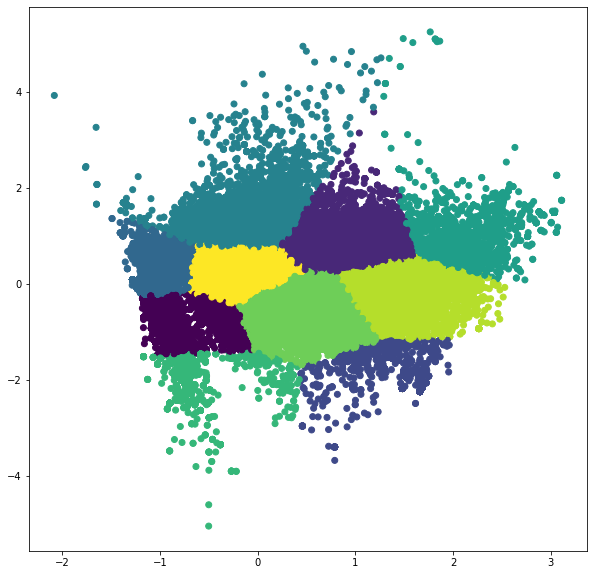

========= Cluster #1 =========
rekt
rekt
rekt
rekt
rekt
rekt
rekt
ok
ok
ok
========= Cluster #2 =========
@ \1\1 group dr's in 1.5 minutez
eu casters to saudi arabia WutFace china
tl to a pogu
sup needs a midlane
lord dominic sends his regards EZ
yone and samira open
nobody cares about na kkonaw
@ the prophet ! POGGERS
heat in ^ 6 vs lakers
brb buying a car lol
========= Cluster #3 =========
they are just bad
armenia will not be silenced
armenia will not be silenced
oce will not be silence
oce will not be silence
oce will not be LUL
turkey will not be silenced
turkey will not be silenced
turkey will not be silenced
turkey will not be silenced
========= Cluster #4 =========
l\1\1\1\1
l\1\1\1\1
l\1\1\1\1
l\1\1\1\1
nicee
couldyounot
couldyounot
arg
\1\1\1\1
\1\1\1\1
========= Cluster #5 =========
na \1\1 4Head
@ papasmithy <3
EZ 4 uol
na china aust
⟒ ⋏ ⏁ ⊑ ☊ ⍜ ⏃ manchicken d
cis = eu
sy KAPOW er
g2 vs tl
tl vs g2
g2 vs tl
========= Cluster #6 =========
BibleThump i come from a land down u

0    15083
9    13703
3    12721
4    10967
7     7728
8     6684
1     6236
2     4622
5     3654
6     2278
dtype: int64

Saving to ../data/cluster_outputs/riot_games_LoL/v1/756260657.csv


In [67]:
vis1 = ChatVisualizer(
    ['../data/chat/riot_games_LoL/756260657.srt'],
    wv,
    output_path='../data/cluster_outputs/riot_games_LoL/v1/756260657.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=10,
    MAX_WORDS=-1
);


Processing Messages...
Reading in ../data/chat/riot_games_LoL/770925254.srt


100%|██████████| 94732/94732 [00:07<00:00, 13306.39it/s]


Embedding: (88670, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 10
Visualizing...


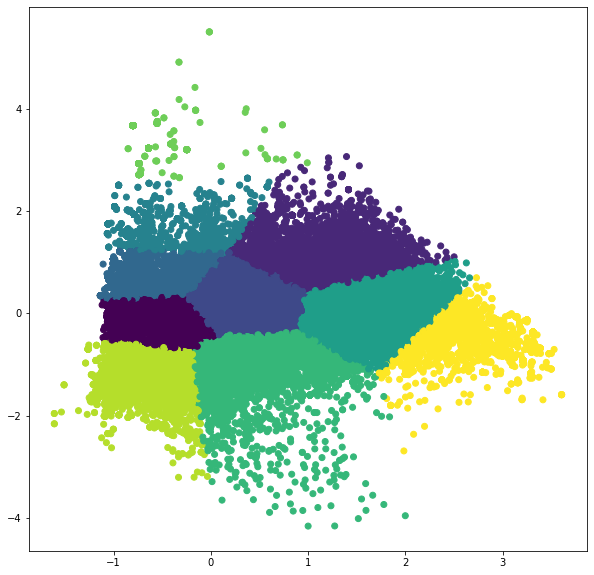

========= Cluster #1 =========
KappaPride Kreygasm
KappaPride Kreygasm
massage
massage
massage
massage
massage
massage
massage
massage
========= Cluster #2 =========
its true damage time
who won last game
where is earings ?
eho is this
ornn is just stupid tho
hyped for fourth game ?
jif in the
na is so cringe
he picked it POGGERS
what a dive
========= Cluster #3 =========
nice skin
butt ? kindred
naughty america LUL
pogchamp u
hurry up
@ where
why braum
twitch chat ResidentSleeper
eye l
daily golden Kappa test
========= Cluster #4 =========
tf
tf
tf
tf
tf
tf
tf
3d
angles
nail
========= Cluster #5 =========
black
death
death
sound
sound
sound
sound
sound
sound
sound
========= Cluster #6 =========
why does ls sound like URL
CurseLit fire your design team VoteYea rework sertraline seraphim
CurseLit fire your design team VoteYea rework sertraline seraphim
CurseLit fire your design team VoteYea rework sertraline seraphim
CurseLit fire your design team VoteYea rework sertraline seraphim
Curs

8    17772
0    15138
2    11940
3    11137
6     8827
5     8141
4     5836
1     5526
9     2961
7     1392
dtype: int64

Saving to ../data/cluster_outputs/riot_games_LoL/v1/770925254.csv


In [68]:
vis1 = ChatVisualizer(
    ['../data/chat/riot_games_LoL/770925254.srt' ],
    wv,
    output_path='../data/cluster_outputs/riot_games_LoL/v1/770925254.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=10,
    MAX_WORDS=-1
);

Processing Messages...
Reading in ../data/chat/xQcOW_minecraft/893334860.srt


100%|██████████| 299324/299324 [00:15<00:00, 19917.56it/s]


Embedding: (274384, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 10
Visualizing...


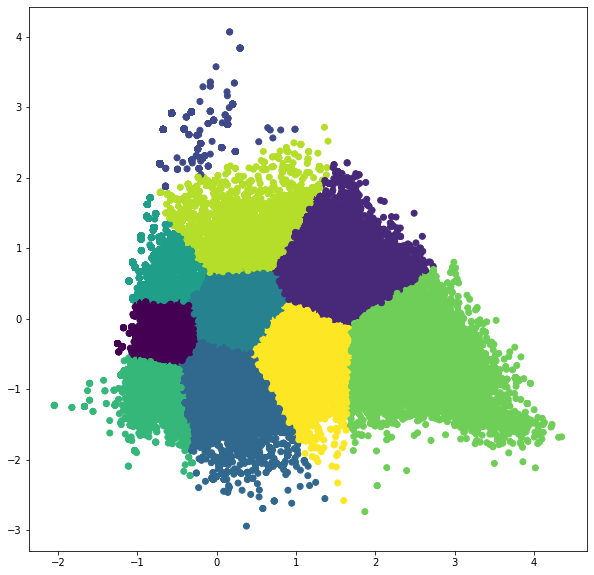

========= Cluster #1 =========
PepePls
PepePls
PepePls
PepePls
PepePls
PepePls
PepePls
PepePls
PepePls
PepePls
========= Cluster #2 =========
pogu i still believe
i still believe pogu
i still believe pogu
yeah u ruined it
WutFace get off
POGGERS the react guy
POGGERS the react guy
POGGERS the react guy
POGGERS the react guy
POGGERS the react guy
========= Cluster #3 =========
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
OMEGALUL
========= Cluster #4 =========
bogged allo ?
bogged allo ?
bogged allo ?
bogged allo ?
bogged allo ?
bogged allo ?
bogged allo ?
yo wtf monkaw
3head yea bruv
chat nymncorn
========= Cluster #5 =========
2 forsencd
LULW bait doon
sam me
pepepains forsen fans
butthole sex
normal mode DansGame
faze bone POGGERS
believers coping LULW
pepelaugh teatime .
pepelaugh teatime .
========= Cluster #6 =========
blizzard
re
re
re
sumSmash
sumSmash
sumSmash
sumSmash
sumSmash
sumSmash
========= Cluster #7 =========
ps\1\1
nopers monkaeyes
l

6    48579
0    41198
5    32487
3    29474
4    29068
9    23495
1    22530
7    17295
2    15979
8    14279
dtype: int64

Saving to ../data/cluster_outputs/xQcOW_minecraft/v1/893334860.csv


In [69]:
vis2 = ChatVisualizer(
    ['../data/chat/xQcOW_minecraft/893334860.srt'],
    wv,
    output_path='../data/cluster_outputs/xQcOW_minecraft/v1/893334860.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=10,
    MAX_WORDS=-1
);


Processing Messages...
Reading in ../data/chat/xQcOW_minecraft/911761347.srt


100%|██████████| 293815/293815 [00:15<00:00, 18681.00it/s]


Embedding: (269229, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 10
Visualizing...


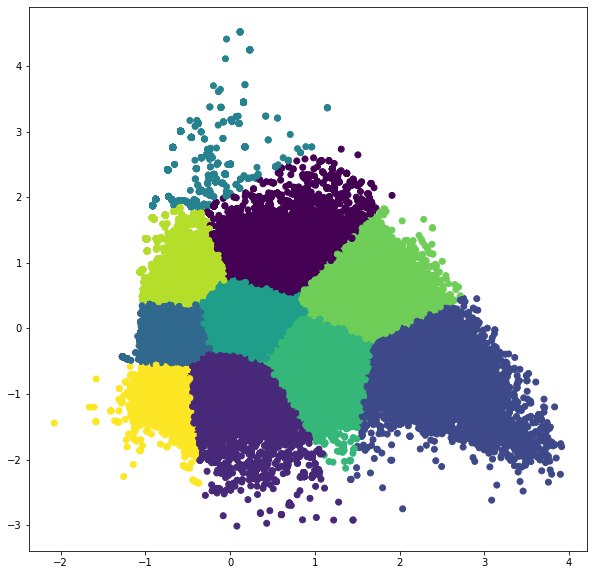

========= Cluster #1 =========
think harder
3 more
3 more
3 more
3 more
3 more
3 more
2 more
2 more
2 more
========= Cluster #2 =========
hi :D
hi :D
uh o
peepoglad balls
feelsstrongman RIP donos
feelsstrongman Clap bl femboy
below komodohype
forsens law doubter
pogchimp stfu dono
\1\1 ] refer\1\1
========= Cluster #3 =========
do the ll again it's so funny
bruh 😎 don ’ t finish the problem
xqcow when are you doing super seducer
xqcow when are you doing super seducer
xqcow when are you doing super seducer
hey x did you beat the minecraft record ?
it doesn't matter i'm still drippin EZ xqcow ,
alright you dont need to lie lol
@x qcow you have even more pearls in inventory
you got this x much love <3
========= Cluster #4 =========
drip
drip
drip
drip
bloons
b2
b2
b2
b2
b2
========= Cluster #5 =========
LULW
LULW
LULW
LULW
LULW
LULW
LULW
LULW
LULW
LULW
========= Cluster #6 =========
volume ?
volume ?
volume ?
volume ?
volume ?
? volume
volume ?
volume ?
volume ?
volume ?
========= Cluster

9    49425
3    37044
8    36337
5    30596
1    26843
7    23935
6    23858
2    14501
0    14072
4    12618
dtype: int64

Saving to ../data/cluster_outputs/xQcOW_minecraft/v1/911761347.csv


In [70]:
vis2 = ChatVisualizer(
    ['../data/chat/xQcOW_minecraft/911761347.srt' ],
    wv,
    output_path='../data/cluster_outputs/xQcOW_minecraft/v1/911761347.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=10,
    MAX_WORDS=-1
);


Processing Messages...
Reading in ../data/chat/sykkuno_amongus_valorant/894695595.srt


100%|██████████| 75665/75665 [00:03<00:00, 23696.32it/s]


Embedding: (61501, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 16
Visualizing...


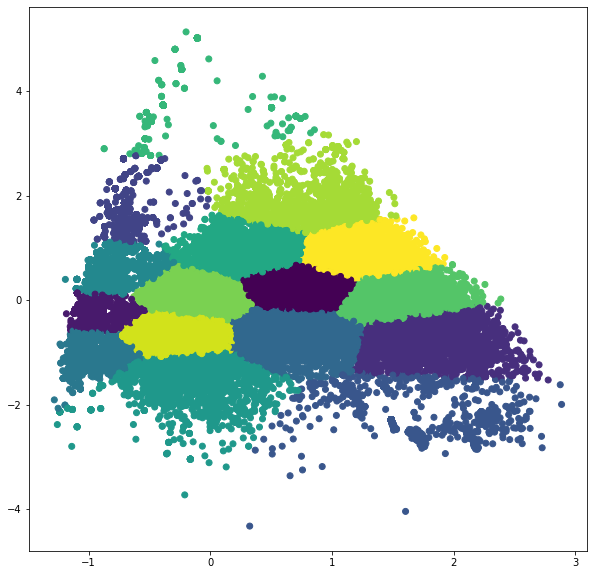

========= Cluster #1 =========
theyre so cute lol
love tina so much
GivePLZ TakeNRG is everything :p
toast killed ray and
toast killed ray and
rae is dream now lol
you color blind ?
is rae playing
no , not game
bret the rock man LUL
========= Cluster #2 =========
hallow
WutFace
WutFace
WutFace
WutFace
1v6
whew
whew
whew
nw
========= Cluster #3 =========
wait and you didn ’ t kill anyone hahahaha
this day will go down in history as a scam yep
i think theyre talking about you telling her she prefers hafu lobbies @
did he say my name ? 💀 🏃 🏽 ♀ ️ 😭
it ’ ll curdle in ur stomach !
can someone tell me whats on his chin ?
how long has he been streaming yall ?
@ its a bandaid , he scratched himself because of his skin condition
did you get a hickie @
why do you have a band aid syk
========= Cluster #4 =========
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
========= Cluster #5 =========
converted from a prime sub to tier 1 !
converted from a prime sub to tier 1 !
converted from a prime sub to tier 1 

6     7994
1     7515
7     6697
11    4772
0     4035
3     3955
15    3783
12    3763
14    3519
9     3033
5     2899
2     2815
8     2634
13    1894
4     1748
10     445
dtype: int64

Saving to ../data/cluster_outputs/sykkuno_amongus_valorant/v1/894695595.csv


In [71]:
vis3 = ChatVisualizer(
    ['../data/chat/sykkuno_amongus_valorant/894695595.srt'],
    wv,
    output_path='../data/cluster_outputs/sykkuno_amongus_valorant/v1/894695595.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=16,
    MAX_WORDS=-1
);


Processing Messages...
Reading in ../data/chat/sykkuno_amongus_valorant/914368342.srt


100%|██████████| 97726/97726 [00:04<00:00, 23879.91it/s]


Embedding: (81341, 128)
Projecting Embedding into 2D...
Method Used: pca
Clustering Messages...
Method: kmeans
Number of clusters found: 16
Visualizing...


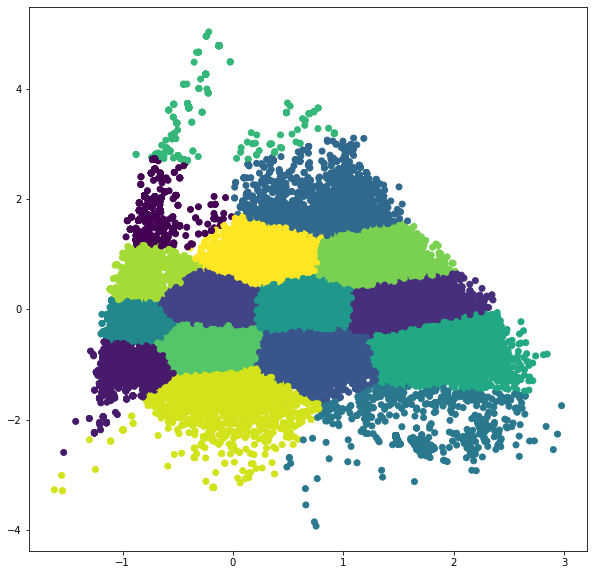

========= Cluster #1 =========
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
========= Cluster #2 =========
(:
(:
Squid4
Squid4
llg
DoritosChip
DoritosChip
DoritosChip
DoritosChip
DoritosChip
========= Cluster #3 =========
chat my guy , shut about the poll
ash is going to win
ash is going to win
doubters bout to be rich asf LUL
@ yeah it ’ s sad honestly
" i'm hurt bad with 92 health
do you like attack on titans ?
omg the jester mode , time for some crazy play
what does the sheriff role do ?
did u watch the new aot episode ?
========= Cluster #4 =========
rae said
jae died
cosmic brain
detective toast lol
oh dear lmao
yes ,
wrinkly brain
red sweater
red sweater
oh geez lol
========= Cluster #5 =========
points to b\1\1
request a gun
request a gun
97 compliments to rae ?
happy lonely day everyone !
happy friends day :D d
no way -
a\1\1 rae c and
lessgo big come back !
@ peter scarra and rae
========= Cluster #6 =========
he was jester
he was jester
he was jester
wth is this
the other way arou

7     10571
1     10016
13     9175
2      6392
12     5555
0      5025
8      4993
3      4802
11     4676
14     4028
15     3895
9      3845
4      3135
5      2813
6      1952
10      468
dtype: int64

Saving to ../data/cluster_outputs/sykkuno_amongus_valorant/v1/914368342.csv


In [72]:
vis3 = ChatVisualizer(
    ['../data/chat/sykkuno_amongus_valorant/914368342.srt' ],
    wv,
    output_path='../data/cluster_outputs/sykkuno_amongus_valorant/v1/914368342.csv',
    dimensionality_method='pca',
    cluster_method='kmeans',
    n_clusters=16,
    MAX_WORDS=-1
);


In [40]:
# from tqdm import tqdm

# fig, ax = plt.subplots(figsize=(8,8))
# ax.scatter(vis1.embeddings2d[:,0],vis1.embeddings2d[:,1],c=vis1.clusterer.labels_)

# for i, txt in tqdm(enumerate(vis1.messages_processed)):
#     if i%100:
#         try:
#             if "\\" not in text:
#                 plt.annotate(txt, (vis1.embeddings2d[:,0][i], vis1.embeddings2d[:,1][i]))
#         except:
#             pass

# plt.show();

